# ROC AUC 
Receiver operating characteristic (ROC) graphs are used for selecting the most appropriate classification models based on their performance with respect to the false positive rate (FPR) and true positive rate (TPR). These metrics are computed by shifting the decision threshold of the classifier. ROC curve is used for probabilistic models which predict the probabilities of the class.

Ideal decision threshold: Idea decision threshold can be one which results in very high value of TPR (close to 1) and very low value of FPR (close to 0)

AUC represents Area Under ROC Curve. The area under ROC curve is computed to characterise the performance of a classification model. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

## Dataset 1

- Plotting ROC with Framingham datset
- Will a patient have a 10 year risk of developing a cardio vascular diseases?

In [1]:
import pandas as pd
def loading_data():
    global data
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:

        data = pd.read_csv(filename)
        
loading_data()

Please enter file name with extension : framingham.csv


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

y = data['TenYearCHD'].copy()
    
X = data.drop('TenYearCHD',axis=1)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [3]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [5]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.6424816131520042 0.6366175723717624


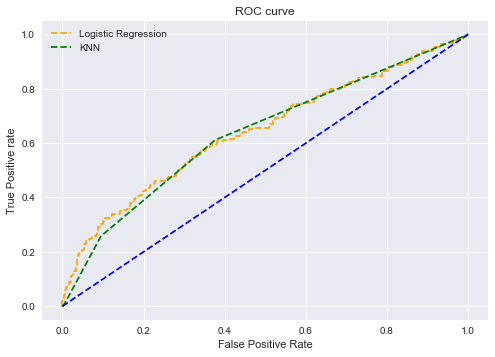

In [7]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

Since AUC for logistic regression is 64 we will consider logistic regression for this dataset.As logistic regression predicts more accurate than KNN.

## Dataset 2 ROC AUC For Multiclass.
2126 fetal cardiotocograms (CTGs) and the respective diagnostic features.

In [14]:
import pandas as pd
def loading_data():
    global data
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:

        data = pd.read_csv(filename)
        
loading_data()


Please enter file name with extension : CTG.csv


In [15]:
df=data.drop(["FileName","Date","SegFile","b","e","A", "B","C", "D" ,"E", "AD", "DE" ,"LD", "FS", "SUSP"],axis=1)

In [16]:
df = df.dropna()

In [17]:
X=df.drop(["NSP","CLASS"],axis=1)

y=df["NSP"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [19]:
df

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0
5,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,0.0,9.0,...,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,8.0,3.0
6,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,0.0,6.0,...,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,8.0,3.0
7,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,15.6,0.0,...,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,9.0,3.0
8,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,13.6,0.0,...,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,9.0,3.0
9,122.0,122.0,0.0,0.0,3.0,86.0,0.3,6.0,10.6,0.0,...,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,9.0,3.0


In [20]:
nsp_classes = y.unique()
nsp_classes

array([2., 1., 3.])

In [41]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = y
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
y = onehot_encoded
y.shape

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
5       3.0
6       3.0
7       3.0
8       3.0
9       3.0
10      2.0
11      2.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      2.0
18      1.0
19      1.0
20      3.0
21      1.0
22      3.0
23      3.0
24      3.0
25      3.0
26      3.0
27      3.0
28      2.0
29      1.0
       ... 
2096    1.0
2097    1.0
2098    1.0
2099    1.0
2100    1.0
2101    1.0
2102    1.0
2103    1.0
2104    1.0
2105    1.0
2106    1.0
2107    1.0
2108    1.0
2109    1.0
2110    1.0
2111    1.0
2112    1.0
2113    1.0
2114    1.0
2115    1.0
2116    1.0
2117    1.0
2118    1.0
2119    1.0
2120    1.0
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: NSP, Length: 2126, dtype: float64
[1 0 0 ... 1 1 0]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


(2126, 3)

In [42]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)

X[0:3]

X.shape

(2126, 23)

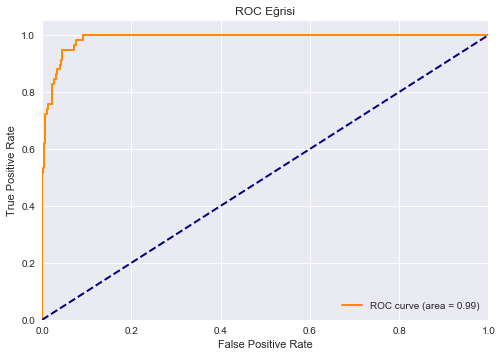

In [54]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.neural_network import MLPClassifier 

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
y_score = pred_prob

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"]) 

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 2. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

### Plotting ROC-AUC Curve Belonging To All Classes.

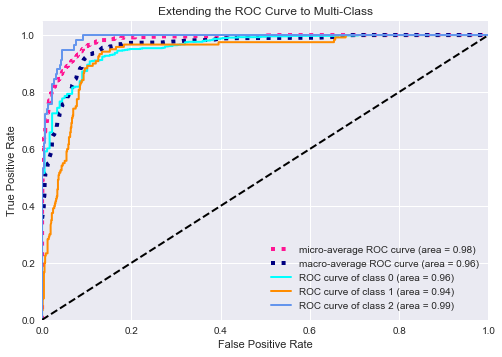

In [55]:
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

From the graph it is clear that:
- model is 99% correctly predicting class 2 as 2.
- 96% correctly class 0 as 0.
- 94% correctly class 1 as 1.